# Exploration Exercises
---

In [60]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from wrangle import wrangle_telco, get_telco_data, split_data
from prepare import add_scaled_columns

import warnings
warnings.filterwarnings('ignore')

In [61]:
train, validate, test = wrangle_telco()

## 1.
Write a function, `plot_variable_pairs(dataframe)` that plots all of the pairwise relationships along with the regression line for each pair.

In [62]:
def plot_variable_pairs(df):
    '''
    Accepts the telco_churn train set
    Returns all pairwise relationships between attributes
    '''
    plotted_columns = []
    columns_to_plot = df.select_dtypes(exclude='O').columns.values

    for column in columns_to_plot:
        for pair in columns_to_plot:
            if column != pair:
                sns.regplot(x=column,
                            y=pair,
                            data=train,
                            line_kws={"color": "red"},
                           ).set_title(column + " and " + pair)
                plt.show();

## 2.
Write a function, `months_to_years(tenure_months, df)` that returns your dataframe with a new feature `tenure_years`, in complete years as a customer.

In [63]:
def months_to_years(df):
    df['tenure_years'] = round(df.tenure / 12, 0)
    df = df[['customer_id',
             'monthly_charges',
             'tenure',
             'tenure_years',
             'total_charges'
    ]]
    return df

## 3.
Write a function, `plot_categorical_and_continuous_vars(categorical_var, continuous_var, df)`, that outputs 3 different plots for plotting a categorical variable with a continuous variable, e.g. `tenure_years` with `total_charges`. For ideas on effective ways to visualize categorical with continuous: https://datavizcatalogue.com/. You can then look into seaborn and matplotlib documentation for ways to create plots.

In [64]:
train = months_to_years(train)

In [65]:
train.head()

,customer_id,monthly_charges,tenure,tenure_years,total_charges
1652,9769-TSBZE,66.00,70,6.0,4891.50
687,4129-LYCOI,104.00,67,6.0,7039.05
560,3407-JMJQQ,109.00,71,6.0,7661.80
851,5183-KLYEM,112.75,72,6.0,8192.60
1032,6242-FEGFD,96.60,66,6.0,6424.25


In [66]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1224 entries, 1652 to 1316
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   customer_id      1224 non-null   object 
 1   monthly_charges  1224 non-null   float64
 2   tenure           1224 non-null   int64  
 3   tenure_years     1224 non-null   float64
 4   total_charges    1224 non-null   float64
dtypes: float64(3), int64(1), object(1)
memory usage: 57.4+ KB


In [69]:
def monthly_charges_cohorts(df):
    '''
    
    '''
        df['monthly_charges_cohorts'] = pd.cut(train.monthly_charges,
                                               bins=[18, 38, 58, 78, 98, 118, 138]
                                              )
        return df

In [71]:
train = monthly_charges_cohorts(train)

In [95]:
def plot_categorical_and_continuous_cars(categorical_var, continuous_var, df):
    '''
    Accepts
    Returns
    '''
    sns.boxplot(data=df,
                x=categorical_var,
                y=continuous_var
               )
    plt.show()
    
    sns.swarmplot(data=df,
                  x=categorical_var,
                  y=continuous_var
                 )
    plt.show()
    
    # Experimental `hue` argument 
    sns.violinplot(data=df,
                x=categorical_var,
                y=continuous_var
               )
                # hue='monthly_charges_cohorts'
    plt.show()

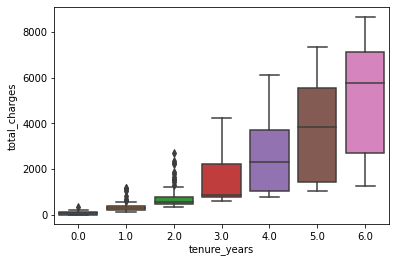

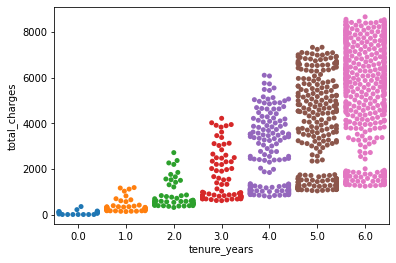

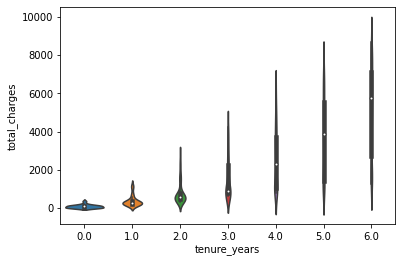

In [96]:
plot_categorical_and_continuous_cars('tenure_years', 'total_charges', train)

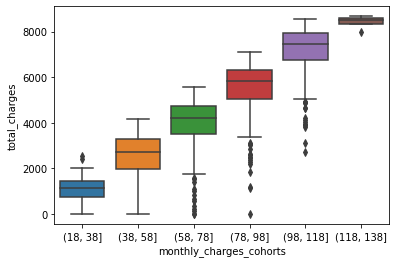

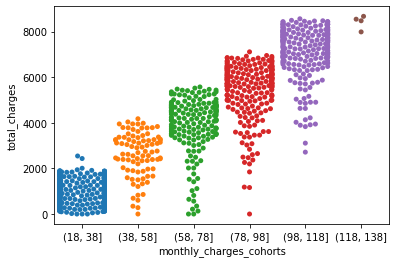

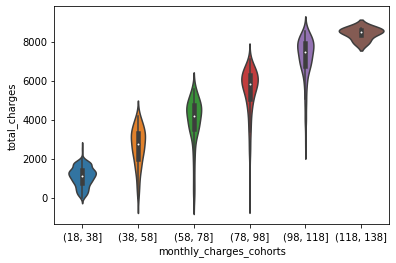

In [97]:
plot_categorical_and_continuous_cars('monthly_charges_cohorts', 'total_charges', train)

###  Tests

In [45]:
df = get_telco_data()
df = months_to_years(df)

In [46]:
df['monthly_charges_cohorts'] = pd.cut(train.monthly_charges,
                                      bins=[18, 38, 58, 78, 98, 118, 138],
                                     )

In [47]:
pd.crosstab(df.tenure_years, train.monthly_charges_cohorts)

monthly_charges_cohorts,"(18, 38]","(38, 58]","(58, 78]","(78, 98]","(98, 118]","(118, 138]"
tenure_years,,,,,,
0.0,16,3,4,2,0,0
1.0,38,8,4,1,0,0
2.0,57,4,7,4,2,0
3.0,52,7,7,10,7,0
4.0,82,14,33,28,23,0
5.0,84,16,48,50,45,0
6.0,136,32,84,149,164,3
